# "Cross Entropy and Maximum Likelihood Estimation"
> "In this article, I will discuss what Cross Entropy means from an information theoretical point of view and how it relates to key concepts in Machine Learning, including the log-loss cost function in linear regression classification and parameter estimation."

- toc: true
- branch: master
- math: true
- badges: true
- comments: true
- categories: [Tutorial, Information Theory, Cost Function, Maximum Likelihood Estimation, Entropy, Cross Entropy, Log-loss Function, Kullback-Leibler Divergence]
- image: images/graphs_cross_entropy.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

## Introduction

Entropy in Thermodynamics is a measure of a system's disorder: the higher the disorder, the greater the entropy. Information can also be seen as a form of entropic measure. Information that is "unordered", that is, which is highly uncertain, presents us with more surprise than well-established, organized facts. It is hence more "informative".

It is also of interest to note that such concepts in Thermodynamics as the Gibbs Free Energy (the enthalpy minus the product of the temperature and the entropy) have corresponding properties, quantities and concepts in Information Theory. And this is not by chance, as the arrangement and the evolution of the state of matter conveys information and, ultimately, tweaking with the properties of matter is how information is conveyed. Think about the way digital information is relayed. The standard is to have it transmitted via fluctuations in electromagnetic waves. These waves are said to be modulated by the data.

That is not the end of it. Information Theory finds its way also in Machine Learning. Machine Learning is the science of finding patterns, of trying to elicit information from that which we observe. I did not use the word information by chance, as the role of models, independent variables, and parameter estimation (in the traditional sense of maximum-likelihood estimation) is to obtain from a complex observation its essentials for prognostics, prediction, clustering, and a myriad of other applications.

In what follows, we will explore one very interesting quantity: the cross entropy. We will see that its main virtue is to compare a model to experimental data and to tell how much excess information is required for modeling data with a probability distribution different to the true ditribution of the data. 

## Entropy as a Measure of Uncertainty

In order to understand cross entropy, we must first lay out the foundations of entropy. This quantity is a description of the uncertainty of a random variable. We want to measure how uncertain a probabilistic event is. Essentially, the more unlikely an event is, the more surprising it is and, consequently, the more information it holds. To say that it is raining now contains no information. It is a certain event that bears no surprise. However, to say that there is a $35$% probability that it will rain tomorrow does contain information. If we were faced instead with a probability of $50$% that it will rain, would we be more or less certain of tomorrow's weather? It seems reasonable to say that we would be less certain, because the $35$% probability of rain implies a probability of $65$% of no rain, whilst $50$% either way essentially leaves us with the most amount of doubt possible. This is an essential aspect of entropy: it is maximized for equally-likely events. Another illustrative example is a biased die and a fair die. Let us imagine that the biased die is heavily biased towards the six-dotted side such that for this die's events $\{1,2,3,4,5,6\}$, the corresponding set of probabilities is given by 

\\[
\left\lbrace \frac{1}{12},\frac{1}{12},\frac{1}{12},\frac{1}{12},\frac{1}{12}, \frac{7}{12} \right\rbrace
\\]. 

The fair die, on the other hand, follows the traditional distribution 

\\[
\left\lbrace \frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6} \right\rbrace 
\\].

If you were to gamble, which die would you pick? Which one makes you less uncertain of your choice, or, better still, which one decreases the entropy you experience? Evidently, it is **not** the fair die, for, once again, uniform distributions maximize entropy. 

As we can see, there is a relationship between the probability of a random variable's events and its entropy. Let $X$ be a random variable, $\mathcal{X}$ its support group, and $H(X)$ its entropy. According to [Cover-Thomas,2006], entropy is defined as

\\[
    \label{eq:entropy}
    H(X) \triangleq \sum\limits_{x \in \mathcal{X}} p_X (x) \log_2\left( \frac{1}{p_X (x)} \right) = -\sum\limits_{x \in \mathcal{X}} p_X (x) \log_2\left( p_X (x) \right) \tag{1}
\\]

where the $\log$ function is defined under base $2$. This gives us the basic unit of information: the bit. Entropy can also be computed with different base values, including $e$, in which case the unit of measurement becomes the "nat". It is useful to distinguish now between the information theoretical bit and the bit in computer science. In computer science, the bit is the basic unit of storage. It is the placeholder for data, even redundant, uninformative data. In Information Theory, the bit is the basic unit of actual information, stripped of all redundancy. 

Equation $\eqref{eq:entropy}$ has one important property: $H(x) \geq 0$, because probability values are also greater than or equal to zero. This makes sense, as the natural interpretation of information does not lead to the definition of negative information.

Let $X$ be a random variable with categories $\left\lbrace a,b,c,d \right\rbrace$. If the associated probabilities are $\{ 0.2,0.1,0.3,0.4 \}$, eq. $\eqref{eq:entropy}$ tells us that

$$
\begin{aligned}
    H(X) &= -p(a) \log_2 \left( p(a) \right) - p(b)  \log_2 \left( p(b) \right) - p(c) \log_2 \left( p(c) \right) -p(d) \log_2 \left( p(d) \right) \\
         &= -0.2 \log_2(0.2) - 0.1 \log_2(0.1) - 0.3 \log_2(0.3) - 0.4 \log_2(0.4)
\end{aligned}
$$

where $p(u)$ for $u \in \{a,b,c,d\}$ is a shorthand for $p_X (X = u)$.

In [636]:
#hide
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import string as string
import pprint

In [637]:
H_X = -0.2*np.log2(0.2) - 0.1*np.log2(0.1) - 0.3*np.log2(0.3) - 0.4*np.log2(0.4)
print(H_X)

1.8464393446710154


We observe that on average we can describe $X$ with approximately $1.85$ bits. Those are essential bits that cannot be discarded. If discarded, information is lost. But let us say that we want to represent $X$ with $3$ bits. That is possible, and it would not result in any loss of information, but it does result in redundancy. In communication systems, such redundancy is very undesirable, since it results in a surplus of transmitted energy.

Another interpretation for entropy that is very intuitive is how many binary questions do we have to ask to determine with certainty some piece of information. Say we have a random variable $Y$ with equally-likely events $\{0,1,2,3,4,5,6,7\}$. Say we would like to determine one of those events, how many binary questions do we have to ask? Intuitively, you may have already guessed that 3, hence 3 bits, but let us formalize the questions for $Y=1$, without incurring any loss of generality:

* Is $Y \geq 4$? No, therefore our set has been reduced to $\{0,1,2,3\}$.
* Is $Y \geq 2$? No, therefore our set has been reduced to $\{0,1\}$.
* Is $Y \geq 1$? Yes, and we have found the targeted element.

Based on this question rule and on the Boolean values assigned to the answers, we can even arrive at a possible binary code to event $Y=1$, namely $(001)_2$.

Now, let us focus on an important special case: that of Bernoulli-distributed random variables. Let $X$ be a random variable defined with two possible states $\{0,1\}$. These states are respectively defined by the following probabilities:

$$
\begin{aligned}
    p(0) &= 1 - \theta \\
    p(1) &= \theta 
\end{aligned}
$$

Now, let us vary $\theta \in [0,1]$ within its domain in order to observe the effects on the binary entropy $H(p)$ (it is a standard notation to label the binary entropy with this nomenclature).

In [638]:
def entropy(p,eps): # entropy function
    p = p+eps
    return -np.dot(p,np.log2(p))

In [639]:
eps = 1e-15 # added so that we do not have log(0), which is undefined

In [640]:
nel = 100 # creating the list of entropies for \theta = 0, 0.01, ..., 1
p_list = np.linspace(0,1,nel+1)
p_set = [np.array([p, 1-p]) for p in p_list]
Hp = [entropy(value,eps) for value in p_set]
dic = {'P(x=1)':p_list, 'Hp':Hp} # converting to a dictionary for the Seaborn library

Text(0.5, 1.0, 'Binary Entropy')

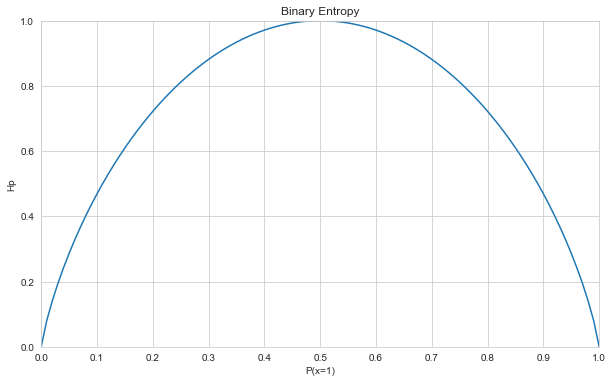

In [641]:
dfentropy = pd.DataFrame(dic) # plotting the binary entropy curve
sns.set_style("whitegrid")
fig_dims = (10, 6)
fig,ax = plt.subplots(figsize=fig_dims)
ax.set(xlim=(0,1), ylim=(0,1), xticks=np.linspace(0,1,11))
sns.lineplot(x="P(x=1)", y="Hp", ax=ax, data=dfentropy)
plt.title('Binary Entropy')

As we can see from the graph, the binary entropy $H(p)$ is zero at both $P(X=1) = 0 $ and $P(X=1) = 1$, because at those two points, the variable is not random; it is certain that it is $0$ and $1$, respectively. On the other hand, at $P(X=1) = 0.5 $, entropy is maximized, since both events are equally likely: $P(X=0) = 0.5$ and $P(X=1) = 0.5$. Consequently, we have the most uncertainty (one bit) at this point.

## Kullback-Leibler Divergence: The Distance Between Probability Density Functions

One quantity very closely related to the entropy is the Kullback-Leibler (KL) Divergence, also known as the relative entropy. Let $X$ be a random variable and let $p_X$ and $q_X$ (for which we will use for convenience the shorthand $p$ and $q$, respectively) be two distributions that describe the probability density function of $X$. The distribution $p$ is the true distribution, the one that generates the observed, experimental data. Distribution $q$, on the other hand, is a modeled distribution. It is the attempt to estimate $p$. According to [Cover-Thomas, 2006], the KL Divergence is defined as

\\[
    \label{eq:KLdiv}
     D(p||q) \triangleq \sum\limits_{x \in \mathcal{X}} p(x) \log \left( \frac{p(x)}{q(x)} \right) \tag{2}
\\]

where the $D(p||q)$ is usually computed with the $\log$ function under base $e$, i.e., the convention is to operate the divergence functional in terms of nats.

The KL divergence measures how similar $q$ is to $p$. Concretely, it tells how many extra bits the distribution $q$ adds to the entropy of $X$. In order to observe this, let us go back to eq. $\eqref{eq:KLdiv}$

$$
\begin{aligned}
\label{eq:KLdiv_cross_entropy}
 D(p||q) &= \sum\limits_{x \in \mathcal{X}} p(x) \log p(x) - p(x) \log (q(x)) \\ 
         &= -\sum\limits_{x \in \mathcal{X}} p(x) \log q(x) - H(X) \tag{3}
\end{aligned}
$$

The sum term on the right is the cross entropy. For the time being, let us simply see it as a form of entropy computed as an expected value with regard to another probability distribution. Let us illustrate this with a numerical example. Let $X$ be a random variable and let its states be $\{a,b,c,d\}$ with probability distribution 

\\[
p = \left\lbrace \frac{1}{4}, \frac{1}{8}, \frac{1}{16}, \frac{9}{16} \right\rbrace
\\]

Its entropy is calculated as 

In [642]:
entropy(np.array([1/4,1/8,1/16,9/16]), eps) * np.log(2) # here the entropy was multiplied by log_e(2) to convert it to nats

1.1034329096381947

Let us now calculate the expected value with regard to a different probability distribution

\\[
q = \left\lbrace \frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{4} \right\rbrace
\\]

This results in

$$
\begin{aligned}
    -\sum\limits_{x \in \mathcal{X}} p(x) \log q(x) &= -\frac{1}{4} \log \frac{1}{4} - \frac{1}{8} \log \frac{1}{4} - \frac{1}{16} \log \frac{1}{4} - \frac{9}{16} \log \frac{1}{4} \\
    &= -\log \frac{1}{4} \left( \frac{1}{4} + \frac{1}{8} + \frac{1}{16} + \frac{9}{16} \right) \\
    &= -\log \frac{1}{4}
\end{aligned}
$$

In [643]:
H_pq = -np.log(1/4)
print(H_pq)

1.3862943611198906


It is clear to see that the entropy represents the random variable with less information. This is in fact another property of the entropy. It stands for the fewest number of information units necessary to describe a random variable.

If $q$ were $p$, i.e., $D(p||p)$ would then reduce to

$$
\begin{aligned}
 D(p||p) &=  -\sum\limits_{x \in \mathcal{X}} p(x) \log p(x) - H(X) \\
         &= H(X) - H(X) = 0
\end{aligned}
$$

This gives us another insight into the KL divergence. Given that $-\sum_{x \in \mathcal{X}} p(x) \log q(x) \geq H(X) $ and $H(X) \geq 0$, then $D(p||p) \geq 0$ and it is equal to 0 iff $-\sum_{x \in \mathcal{X}} p(x) \log p(x) = H(X)$.

## Cross Entropy and its Relationship to KL Divergence

We are now going to give a name to the quantity $-\sum_{x \in \mathcal{X}} p(x) \log q(x)$. As we hinted in the last section, this is the cross entropy $H_{p,q}$. Therefore,

\\[
H_{p,q} = -\sum_{x \in \mathcal{X}} p(x) \log q(x)
\\]

This quantity is extremely closely associated to the KL divergence

## Cross Entropy as a Cost Function in Machine Learning

In [644]:
def cross_entropy(p,q,eps):
    q = q+eps
    return -np.dot(p,np.log(q))

In [645]:
def kullback_leibler(p,q,eps):
    p = p+eps; q = q+eps
    return np.dot(p,np.log(p/q))

In [646]:
eps = 1e-15

In [647]:
p = np.random.rand(10)
p /= p.sum()
cats = list(string.ascii_lowercase[:len(p)])
dic = {'Category':cats, 'Probability':p}
dist = pd.DataFrame(dic)

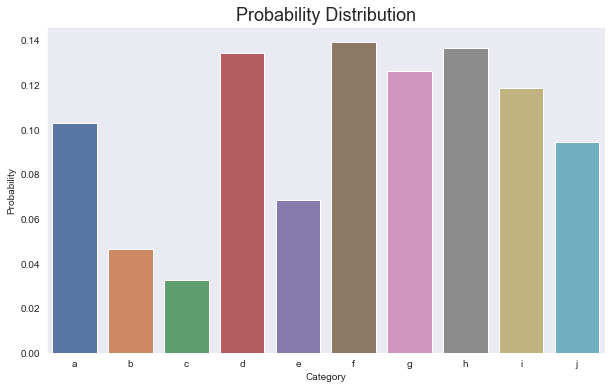

In [648]:
sns.set_style("dark")
fig_dims = (10, 6)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Category", y = "Probability", palette="deep", ax=ax, data=dist)
plt.title("Probability Distribution", size=18)
plt.show()

Writing a similar distribution to $\mathbf{p}$. Let us call it $\mathbf{q}$

In [649]:
q = p.copy()

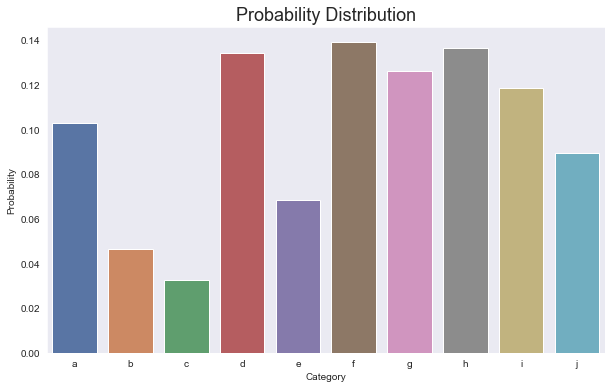

In [650]:
q[-1] = 0.95*p[-1]
dic = {'Category':cats, 'Probability':q}
dist = pd.DataFrame(dic)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Category", y = "Probability", palette="deep", ax=ax, data=dist)
plt.title("Probability Distribution", size=18)
plt.show()

Let us compute now the entropy of each distribution and their cross entropy

In [651]:
entropy(p,eps)

3.2108536778321604

In [652]:
entropy(q,eps)

3.201421118256862

In [653]:
H_pq = cross_entropy(p,q,eps)
print(H_pq)

2.2304307457460752


Now choosing a completely random $\mathbf{q}$

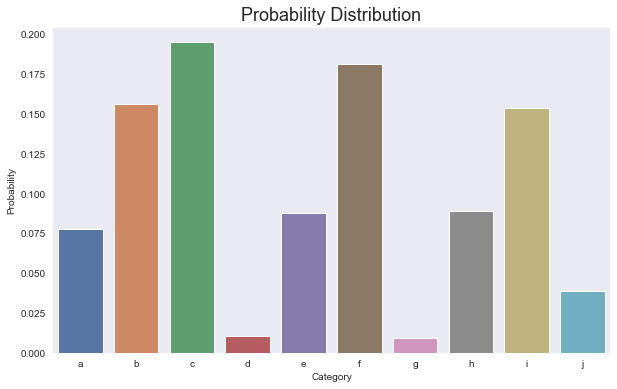

In [654]:
q = np.random.rand(10)
q = q/q.sum()
dic = {'Category':cats, 'Probability':q}
dist = pd.DataFrame(dic)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Category", y = "Probability", palette="deep", ax=ax, data=dist)
plt.title("Probability Distribution", size=18)
plt.show()

In [655]:
H_pq = cross_entropy(p,q,eps)
print(H_pq)

2.8659901038934663


Now let us say that we use the Cross Entropy for the classification problem

The category $a$ is going to be chosen for RV $T$

In [656]:
q = np.zeros(10)
q[0] = 1
pp.pprint(q)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [657]:
cross_entropy(p,q,eps)

30.984043012411497

If $\mathbf{p}$ were close to $\mathbf{q}$, then

In [658]:
p = np.array([0.985, 0.015, 0, 0, 0, 0, 0, 0, 0, 0])

In [659]:
cross_entropy(p,q,eps)

0.5180816459236591

In [660]:
nel = 99
p_list = np.linspace(0, 0.99, nel+1)
N = 8
p_set = [np.pad([p,1-p], (0,N), 'constant', constant_values=0) for p in p_list]
H_pq = [cross_entropy(value,q,eps) for value in p_set]
KL = [kullback_leibler(value,q,eps) for value in p_set]
dic_pq = {'P(x=1)':p_list, 'H_pq':H_pq}
dic_KL = {'P(x=1)':p_list, 'KL':KL}

Text(0.5, 1.0, 'Kullback-Leibler')

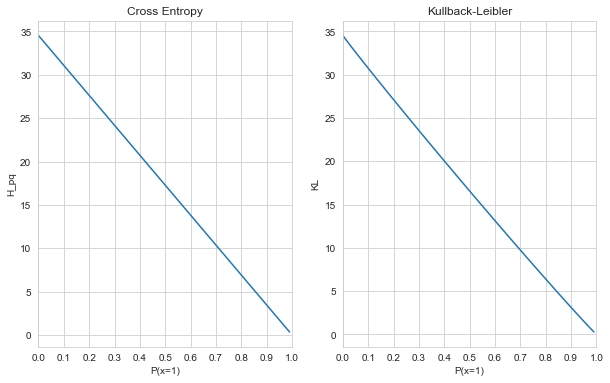

In [661]:
dfcross_entropy = pd.DataFrame(dic_pq)
dfkullback_leibler = pd.DataFrame(dic_KL)
sns.set_style("whitegrid")
fig_dims = (10, 6)
fig,ax =plt.subplots(1,2,figsize=fig_dims)
ax[0].set(xlim=(0,1), xticks=np.linspace(0,1,11))
sns.lineplot(x="P(x=1)", y="H_pq", data=dfcross_entropy, ax=ax[0])
ax[0].set_title('Cross Entropy')
ax[1].set(xlim=(0,1), xticks=np.linspace(0,1,11))
sns.lineplot(x="P(x=1)", y="KL", data=dfkullback_leibler, ax=ax[1])
ax[1].set_title('Kullback-Leibler')

In [662]:
dfcross_entropy.head()

,P(x=1),H_pq
0,0.00,34.538776
1,0.01,34.193389
2,0.02,33.848001
3,0.03,33.502613
4,0.04,33.157225
